# Diamonds Data Exploration

## Preliminary Wrangling

This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
# load in the dataset into a pandas dataframe, print statistics
diamonds = pd.read_csv('diamonds.csv')

In [5]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
print(diamonds.head(10))

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object
   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338

In [6]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

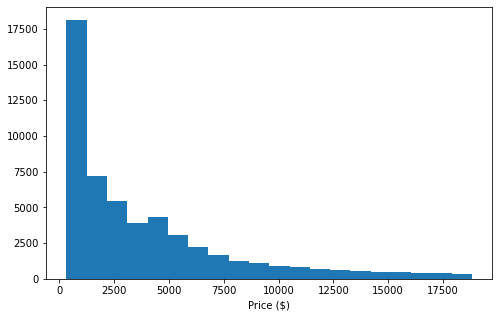

In [12]:
# univariate plot of diamond prices
plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'price', bins=20)
plt.xlabel('Price ($)')
plt.show()

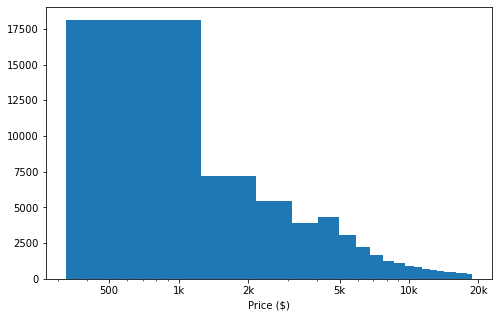

In [13]:
# there's a long tail in the distribution, so let's put it on a log scale instead

plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'price', bins = 20)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price ($)')
plt.show()

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

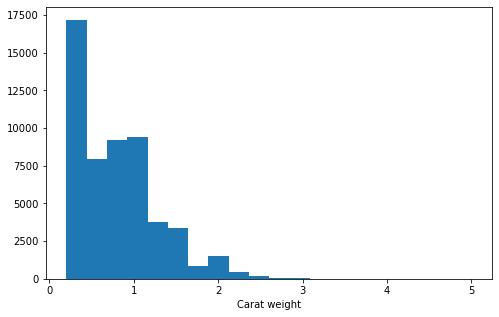

In [16]:
# univariate plot of carat weights
plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'carat', bins=20)
plt.xlabel('Carat weight')
plt.show()

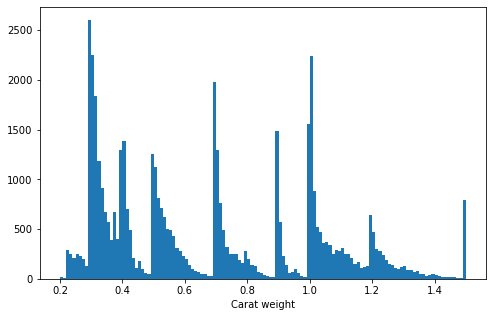

In [18]:
# investigating further on an even smaller bin size
binsize = 0.01
bins = np.arange(0.2, 1.51, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'carat', bins=bins)
plt.xlabel('Carat weight')
plt.show()

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

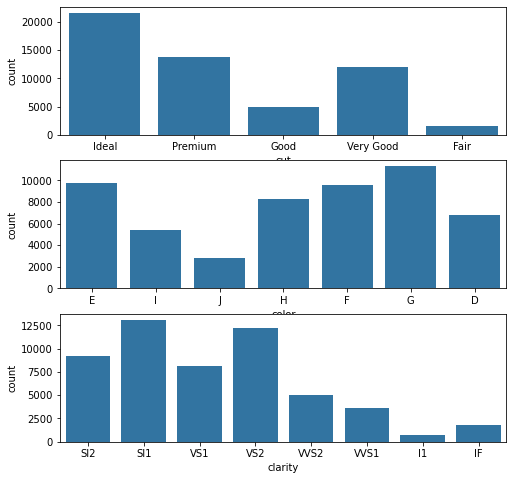

In [21]:
# univariate plots of cut, color, and clarity grades
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = diamonds, x = 'cut', color = default_color, ax = ax[0])
sb.countplot(data = diamonds, x = 'color', color = default_color, ax = ax[1])
sb.countplot(data = diamonds, x = 'clarity', color = default_color, ax = ax[2])

plt.show()

General categorical feature comment: <span style="color:white">Since these features are categorical, you should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. Check the previous page if you need documentation on how the scales are set up, since they're not completely intuitive!</span>

Cut distribution comment: <span style="color:white">The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

Color distribution comment: <span style="color:white">The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)</span>

Clarity distribution comment: <span style="color:white">There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).</span>